In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Group 9 Zomato Analysis.csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


([<matplotlib.patches.Wedge at 0x1a2e5f3b740>,
 [Text(1.0841775006180574, 0.18590090681215662, 'other'),
  Text(0.971485837413598, 0.5159605292120713, 'Buffet'),
  Text(-1.0841774897397436, 0.18590097025467128, 'Dining'),
  Text(0.9714857649520214, -0.5159606656476692, 'Cafes')])

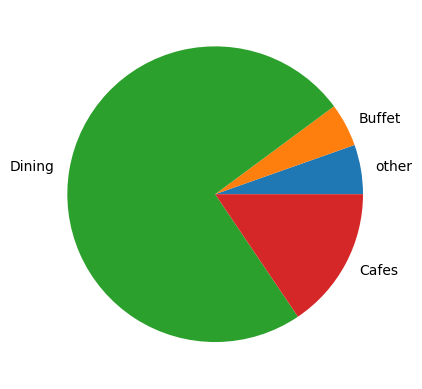

In [5]:
typeList = list(dataframe['listed_in(type)'].values)
unique_types = list(set(typeList))
counts = [(typeList).count(element) for element in unique_types]
plt.pie(counts, labels= unique_types)

Text(0, 0.5, 'Votes')

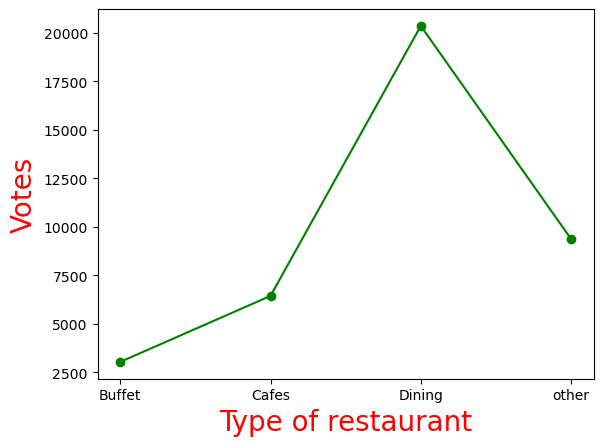

In [6]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


In [7]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [8]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

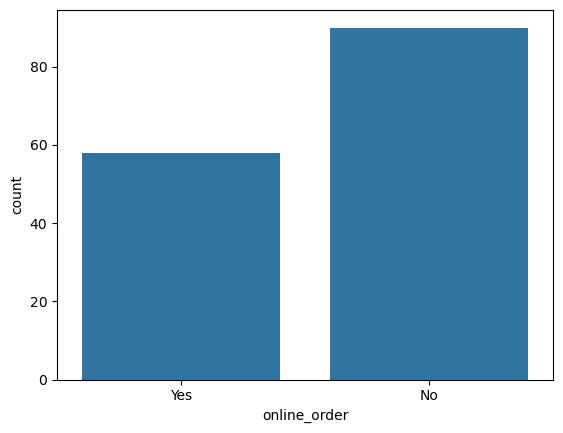

In [9]:
sns.countplot(x=dataframe['online_order'])

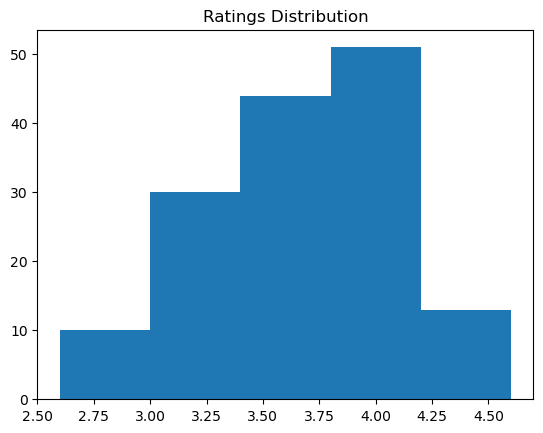

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

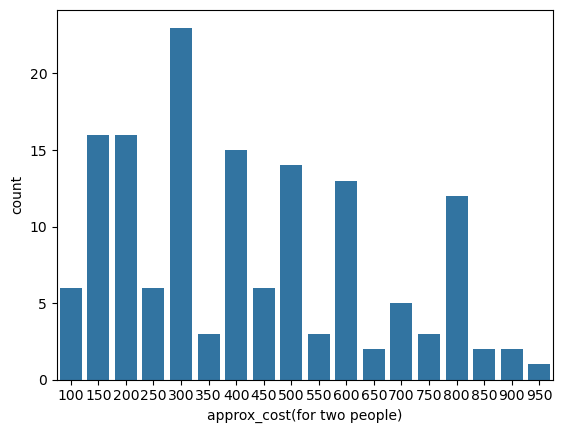

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

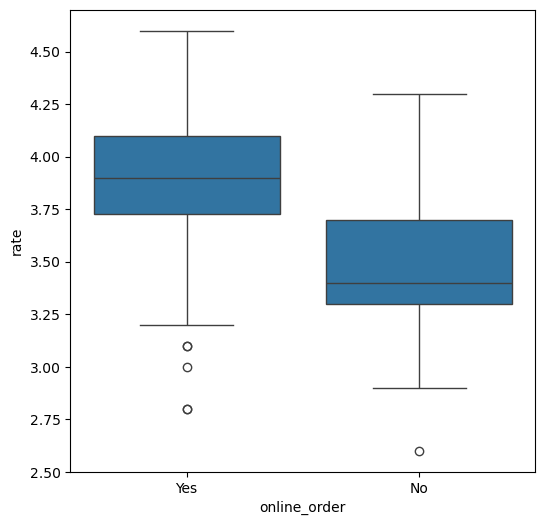

In [12]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


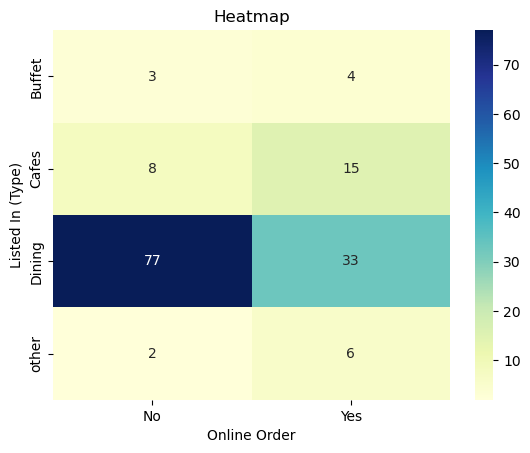

In [13]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')

# Drop rows with missing values
dataframe = dataframe.dropna(subset=['approx_cost(for two people)', 'rate'])


In [16]:
X = dataframe[['rate']]  # Independent variable
y = dataframe['approx_cost(for two people)']  # Dependent variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [19]:
y_pred = tree_model.predict(X_test)


In [20]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 42334.076427786735


|--- rate <= 3.55
|   |--- rate <= 3.05
|   |   |--- rate <= 2.95
|   |   |   |--- rate <= 2.75
|   |   |   |   |--- value: [600.00]
|   |   |   |--- rate >  2.75
|   |   |   |   |--- value: [387.50]
|   |   |--- rate >  2.95
|   |   |   |--- value: [600.00]
|   |--- rate >  3.05
|   |   |--- rate <= 3.25
|   |   |   |--- rate <= 3.15
|   |   |   |   |--- value: [370.00]
|   |   |   |--- rate >  3.15
|   |   |   |   |--- value: [340.00]
|   |   |--- rate >  3.25
|   |   |   |--- rate <= 3.45
|   |   |   |   |--- rate <= 3.35
|   |   |   |   |   |--- value: [288.46]
|   |   |   |   |--- rate >  3.35
|   |   |   |   |   |--- value: [225.00]
|   |   |   |--- rate >  3.45
|   |   |   |   |--- value: [325.00]
|--- rate >  3.55
|   |--- rate <= 4.15
|   |   |--- rate <= 3.85
|   |   |   |--- rate <= 3.65
|   |   |   |   |--- value: [477.78]
|   |   |   |--- rate >  3.65
|   |   |   |   |--- rate <= 3.75
|   |   |   |   |   |--- value: [435.71]
|   |   |   |   |--- rate >  3.75
|   |   |   | 

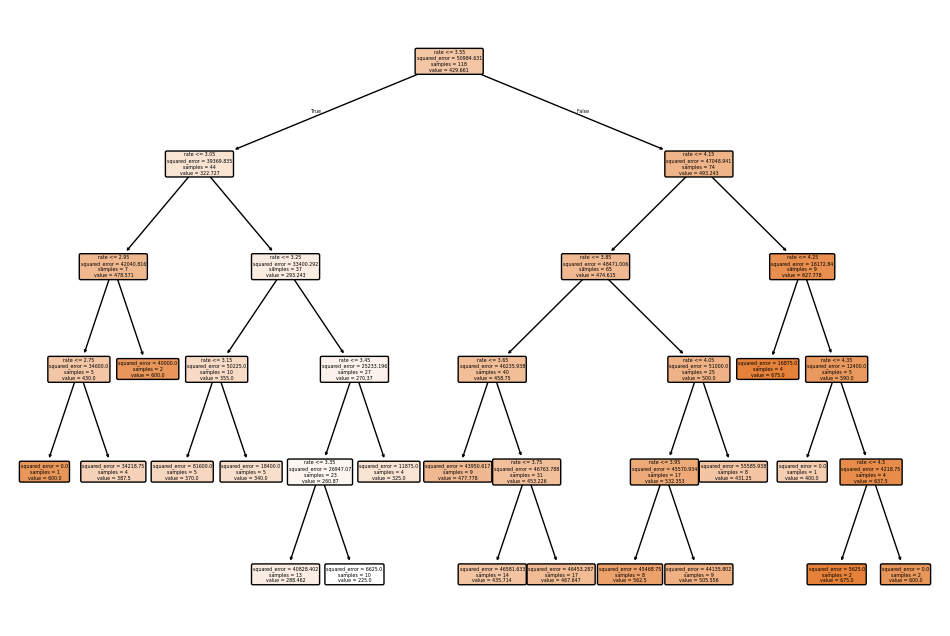

In [21]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Print tree structure as text
tree_rules = export_text(tree_model, feature_names=['rate'])
print(tree_rules)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['rate'], filled=True, rounded=True)
plt.show()


Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Check the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Mean Squared Error: 44522.64448953512
Intercept: -228.1108027798923
Coefficient: 180.29517939146876


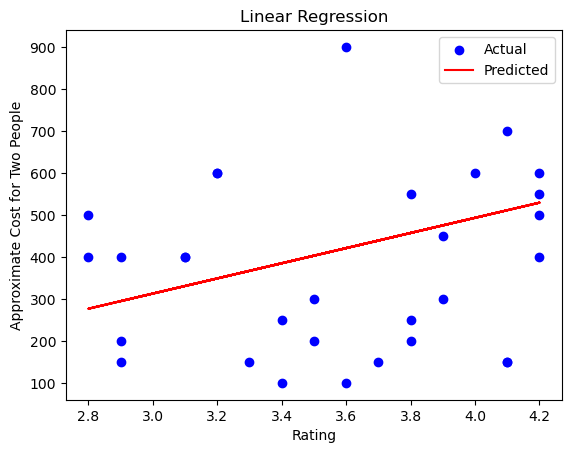

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Rating')
plt.ylabel('Approximate Cost for Two People')
plt.title('Linear Regression')
plt.legend()
plt.show()


Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [28]:
# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)


In [30]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 43063.8147945288


In [31]:
rf_model = RandomForestRegressor(
    n_estimators=200,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

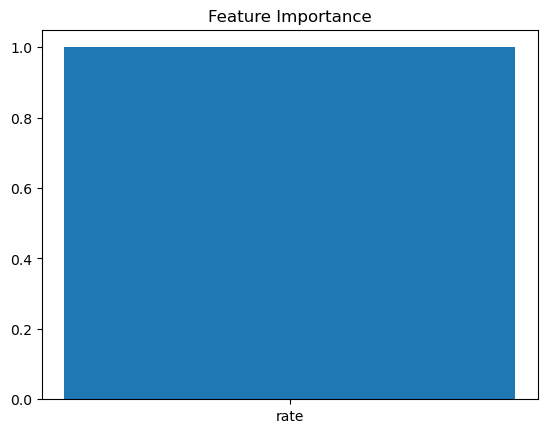

In [32]:
# Visualize feature importance
importance = rf_model.feature_importances_
plt.bar(['rate'], importance)
plt.title('Feature Importance')
plt.show()